<a href="https://colab.research.google.com/github/AdamPoly/TEST/blob/main/TrainYolov8CustomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

ROOT_DIR = '/content/gdrive/My Drive/TrainYolov8CustomDataset'

Mounted at /content/gdrive


In [ ]:
#check architecture du dossier compatible avec training yolo
print("Contenu du dossier : ")
!ls '/content/gdrive/My Drive/TrainYolov8CustomDataset'
print("\nContenu de data : ")
!ls '/content/gdrive/My Drive/TrainYolov8CustomDataset/data'
print("\nContenu de images :")
!ls '/content/gdrive/My Drive/TrainYolov8CustomDataset/data/images'
print("\nContenu de labels :\n")
!ls '/content/gdrive/My Drive/TrainYolov8CustomDataset/data/labels'

Contenu du dossier : 
data  google_colab_config.yaml	hide  TrainYolov8CustomDataset.ipynb

Contenu de data : 
images	labels

Contenu de images :
train  val

Contenu de labels :

train  train.cache  val  val.cache


In [ ]:
ROOT_DIR = '/content/gdrive/My Drive/TrainYolov8CustomDataset'


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.3 MB/s eta 0:00:00


**Utiliser cette cellule de code pour creer un modèle from scratch**

In [ ]:
import os
!pip install ultralytics
from ultralytics import YOLO


# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "google_colab_config.yaml"), epochs=  20)  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

**Utilisez ce code pour utiliser entrainer un modèle que nous avons déja entrainer en chargeant le fichier weights last ou best.Pt**

In [ ]:
import os

from ultralytics import YOLO
weights_path = '/content/gdrive/My Drive/TrainYolov8CustomDataset/hide/runs/detect/train/weights/last.pt'

# Load a model
model = YOLO(weights_path)  # build a new model from scratch

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "google_colab_config.yaml"), epochs=  250)  # train the model





Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/gdrive/My Drive/TrainYolov8CustomDataset/hide/runs/detect/train/weights/last.pt, data=/content/gdrive/My Drive/TrainYolov8CustomDataset/google_colab_config.yaml, epochs=250, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False

# **Tests**


*   Loading of the model we already trained

*   sur un espace de validation (modifier fichier yaml pour acceder au val )
*   sur une unique image



In [ ]:
import os

from ultralytics import YOLO
weights_path = '/content/gdrive/My Drive/TrainYolov8CustomDataset/hide/runs/detect/train/weights/last.pt'

# Load a model et validation with path to validation dataset in the yaml file
model = YOLO(weights_path)  # build a new model from scratch
# loaded model et validation with path to validation dataset in the yaml file
#metrics = model.val()
#metrics.box.map50


Utiliser la cellule suivante UNIQUEMENT pour validation d'un dossier contenant des fichiers et dont le paths est enregistrer dans le fichier yaml, attention a ne pas modifier les paths


In [ ]:
# loaded model et validation with path to validation dataset in the yaml file
metrics = model.val()
metrics.box.map50

Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients
val: Scanning /content/gdrive/My Drive/TrainYolov8CustomDataset/data/labels/val.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.82s/it]
                   all         35        948      0.566      0.419      0.421      0.152
            Bubble_Grp         35         58      0.662      0.328      0.346      0.133
            Bubble_Cir         35        271      0.517      0.284      0.327       0.12
            Bubble_Cmp         35        619      0.519      0.645      0.592      0.202
Speed: 5.3ms preprocess, 41.8ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to runs/detect/val


0.4214953589164336

Tester pour une seul image que vous avez préalablement placer dans Train8vcustomdataset


In [ ]:
!pip install opencv-python


0: 384x640 1 Bubble_Grp, 8 Bubble_Cmps, 90.4ms
Speed: 19.8ms preprocess, 90.4ms inference, 36.3ms postprocess per image at shape (1, 3, 384, 640)


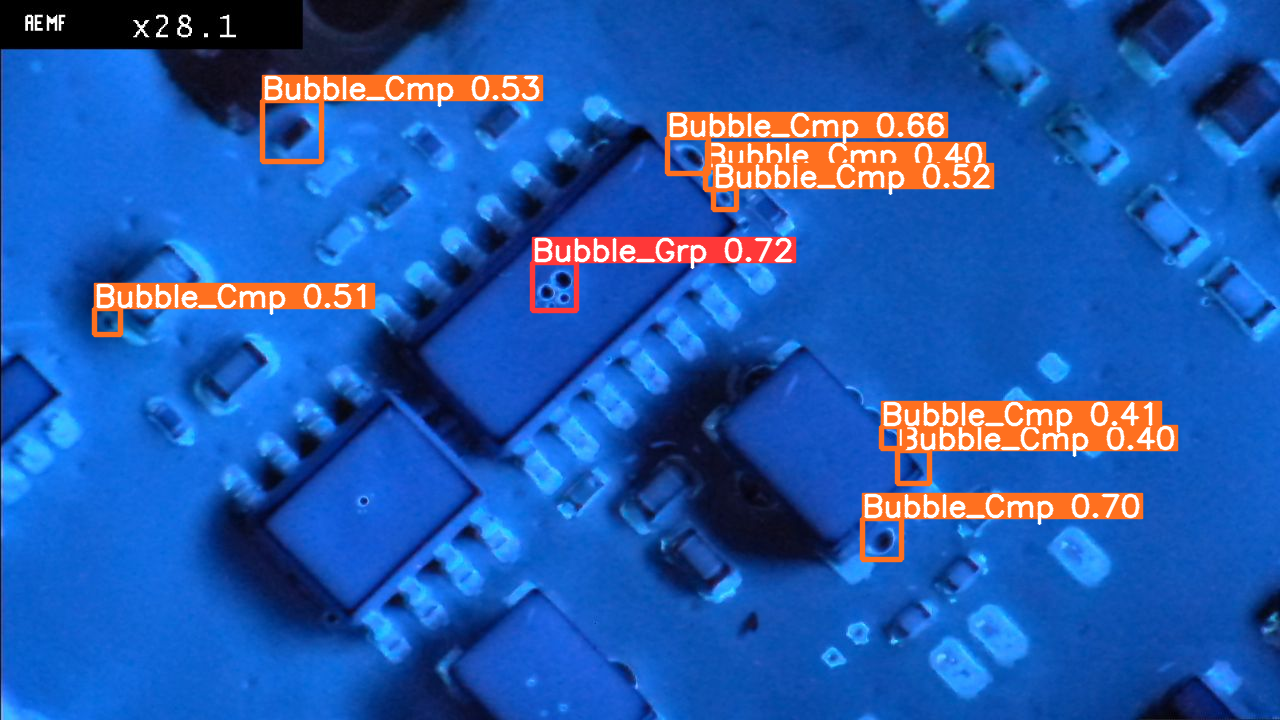

In [ ]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
source = Image.open('/content/gdrive/My Drive/TrainYolov8CustomDataset/image_train (40).jpg')
# test in one image
result = model(source)
boxes = result[0].boxes #bounding box première images
result_plotted = result[0].plot()
cv2_imshow( result_plotted)
#print(boxes)
#box = boxes[0]  # returns one box
#boxes.xywh  # box with xywh format, (N, 4)
#boxes.xyxyn  # box with xyxy format but normalized, (N, 4)
boxes.xywhn  # box with xywh format but normalized, (N, 4)
#boxes.conf  # confidence score, (N, )
#boxes.data
# Save the detection results to a directory
#results.save('/content/gdrive/My Drive/TrainYolov8CustomDataset/')

**Commande de copie des resultats présent dans le dossier run dans le notebook vers le drive** *( si ne marche pas utiliser la cellule de code suivante)*
ps : ne marche pas si un dossiers detect ou run est deja creer mais n'as pas été detecter par le code précedent


In [ ]:
!scp -r /content/runs '/content/gdrive/My Drive/TrainYolov8CustomDataset'

NotImplementedError: ignored

Si la commande précedente ne marche pas utiliser le bibliothéque shutil : attention darori destiniation directory ne dois pas etre deja existant

In [ ]:
import shutil

# Set the source and destination paths
source_path = '/content/runs/'
destination_path = f'{ROOT_DIR}'

# Copy the 'runs' folder to Google Drive
shutil.copytree(source_path, destination_path)


'/content/gdrive/My Drive/TrainYolov8CustomDataset/validation1'